In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1 style='background-color: skyblue; padding: 30px;'>Writeup</h1>

<h2> Project Proposal Title: Evolution of NYT Headlines Over the Last Century </h2>
<h3>Milestone 2</h3>
<h3>Goal: Clean the two datasets to prepare for analysis. </h3>

<ol>
    <li>"Three Decades of New York Times Headlines"</li>
    <ul>
        <li>
            This dataset consists of 31 separate files, each containing similar information on article headlines, source, word count, URL, print section, print page, author, type, publication date, news desk, section, and year. 
        </li>
        <li>
            Before merging these datasets, we reviewed them and noticed some inconsistencies in data types. For example, a variable might appear as letters in one file and numbers in another. Additionally, some columns didn’t follow a consistent format, such as the publication date, which sometimes includes date, hour, and time in a sentence format. We plan to standardize this format later.
        </li>
        <li>
            For this milestone, we standardized column data types, merged all files into a single DataFrame, and checked for missing data. The combined DataFrame now has around 2.8 million records, with some missing values: about 600 headlines, over 700,000 authors, and over 700,000 print page entries.
        </li>
        <li>
            Some authors' names are intentionally left blank, likely for privacy on sensitive topics. Since this missing data doesn’t seem to follow any specific pattern (e.g., more missing data in one decade over another), we chose to focus on the variables that are most critical to our analysis: headlines and News Desk. After assessing the impact, we decided to drop records with missing headlines, as the number of missing entries is minimal and unlikely to affect the results.
        </li>
    </ul>
    <li>"New York Times Articles 1920-2020"</li>
        <ul>
            <li>
                This dataset covers titles and excerpts from New York Times articles between 1920 and 2020, with over 17 million records. Some titles and excerpts are missing, but titles are prioritized for our analysis.
            </li>
            <li>
                Out of 17 million entries, only 261 titles are missing. We reviewed these missing values and confirmed they appear to be randomly distributed rather than concentrated in a particular era, like the 1920s. Therefore, we decided to drop these missing title records, as they are few enough to have minimal impact.
            </li>
        </ul>
    <div style="text-align: center;">
        <img src='missingness_graph.png' style='text-align: center'>
    </div>
    <li>Next Steps: The cleaned datasets are ready for further analysis.</li>
</ol>

—----------------------------------------------------------------------------------------------------------------------------

<ol>
    <li style='font-weight: bold'>"Train Data" -> 1990 - 2020</li>
    <ol>
        <li>
            We accessed our data as yearly CSV files from 1990 to 2020.
        </li>
        <li>
            We aim to Combine the CSV files into one mega data set
        </li>
        <li>
            We first confirmed that each yearly file has the same column names.
        </li>
        <li>
            ✅ We successfully combined the yearly CSV files to our mega data frame! 
        </li>
        <li>
            We also noticed that our columns do not have uniform data types, although these are likely small differences. For instance, there are columns with Dtype 0, which is an object in pandas and stores strings. The column Pub_date gives the date, horu and time. We will decide on the fromat we want later on. 
            <p>	📌 We can clean up the columns so that we have uniform data types.</p>
        </li>
        <li>
            We combined the yearly CSV files to our mega data frame
        </li>
        <li>
            In the merged DataFrame, we have 2,839,966 rows and we are missing around 600 headlines
        </li>
        <li>
            Missing 700K authors, 700K print pages.
        </li>
    </ol>
    <br>
    <li style='font-weight: bold'>“Test Data” → 1900 - 2020</li>
    <ol>
        <li>
            A parquet file.
        </li>
        <li>
            Unpacked and saved as a data frame in our jupyter lab.  
        </li>
        <li>
            This data frame contains 17M entries with year, title, and excerpt columns.
        </li>
        <li>
            We notice that there are some rows with missing excerpts and/or titles.
            <ul>
                <li>
                    Before dropping, we tried to identify the type of missingness to identify if there is any pattern of missingness.
                </li>
                <li>
                    We plotted a bar chart showing the total number of missing titles by year and observed that they appear to be missing completely at random. Drop columns without title → There are only 261 missing rows out of 17M, which is like a drop in the ocean.
                </li>
            </ul>
        </li>
    </ol>
</ol>

<h1 style='background-color: skyblue; padding: 30px;'>First Dataset Preprocessing Code</h1>

In [12]:
vars_dict = {}
dtypes_dict = {}

for i in range(1991, 2021):
    file_name = 'data/dataset_1/new_york_times_stories_' + str(i) + '.csv'
    df = pd.read_csv(file_name) # Df to read each year's csv
    print(df.shape)
    
    df_vars = tuple(df.columns) # A tuple of variables for this df, for this year's csv that is
    vars_dtypes = tuple(df.dtypes)
    
    # See how many different columns names we have
    if df_vars not in vars_dict:
        vars_dict[df_vars] = 1
    else:
        vars_dict[df_vars] += 1
    
    # See all the different permutations of datatypes we have
    if vars_dtypes not in dtypes_dict:
        dtypes_dict[vars_dtypes] = 1
    else:
        dtypes_dict[vars_dtypes] += 1
    
print(vars_dict)
print(dtypes_dict)

(85588, 12)
(86038, 12)
(82020, 12)
(79456, 12)
(85237, 12)
(79789, 12)
(90018, 12)
(94244, 12)
(96261, 12)
(102800, 12)
(111312, 12)
(110050, 12)
(108072, 12)
(107947, 12)
(121485, 12)


/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/373849287.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name) # Df to read each year's csv


(163480, 12)
(100963, 12)
(118895, 12)


/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/373849287.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name) # Df to read each year's csv


(146939, 12)
(112448, 12)
(102969, 12)
(101255, 12)
(88984, 12)
(85951, 12)
(80252, 12)


/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/373849287.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name) # Df to read each year's csv


(69489, 12)
(60424, 12)
(58849, 12)
(53258, 12)
(55493, 12)
{('headline', 'source', 'word_count', 'url', 'print_section', 'print_page', 'author', 'type', 'pub_date', 'news_desk', 'section', 'year'): 30}
{(dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')): 19, (dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64')): 1, (dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')): 10}


In [13]:
dfs = [pd.read_csv('data/dataset_1/new_york_times_stories_' + str(i) + '.csv') for i in range(1991, 2021)]
df = pd.concat(dfs, axis=0)

/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/1932329002.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv('data/dataset_1/new_york_times_stories_' + str(i) + '.csv') for i in range(1991, 2021)]
/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/1932329002.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv('data/dataset_1/new_york_times_stories_' + str(i) + '.csv') for i in range(1991, 2021)]
/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/1932329002.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv('data/dataset_1/new_york_times_stories_' + str(i) + '.csv') for i in range(1991, 2021)]


In [14]:
df.shape

(2839966, 12)

In [15]:
(df.isna()).sum()

headline            582
source                2
word_count            2
url                   2
print_section    689575
print_page       690821
author           728708
type                  2
pub_date              2
news_desk        305231
section            1095
year                  2
dtype: int64

<h1 style='background-color: skyblue; padding: 30px;'>Second Dataset Preprocessing Code</h1>

In [16]:
df = pd.read_parquet('data/nyt_data.parquet')
df.head()

,year,title,excerpt
0,1920,At last the Federal Reserve Board has issued r...,
1,1920,WILL TEST DOOR SERVICE.,Service Board to Further Examine I.R.T. Safety...
2,1920,Sanction for Chinese Contracts.,
3,1920,"LEADS FRAZIER BY 4,496.",Langer's Margin Falls in North Dakota--Gronna ...
4,1920,"CHICAGO, April 30.--With 300 suspicious charac...",Federal Agents and Police Round-- up Suspiciou...


In [17]:
(df == '').sum()

year             0
title          261
excerpt    9405332
dtype: int64

Text(0.5, 1.0, 'Missing Titles by Year of Release')

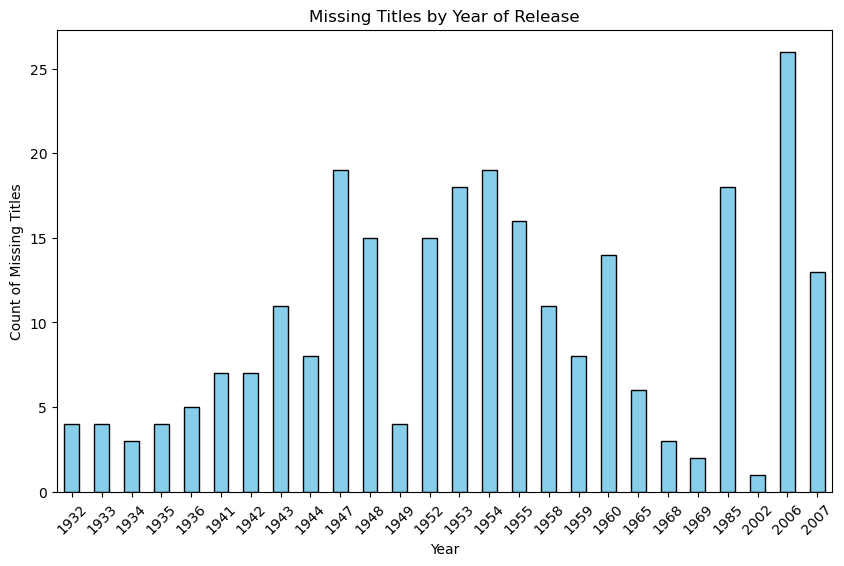

In [18]:
df['title_missing'] = (df['title'] == '')
missing_by_year = df[df['title_missing']].groupby('year').size()

plt.figure(figsize = (10,6))
missing_by_year.plot(kind='bar', color = 'skyblue', edgecolor = 'black')
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.ylabel('Count of Missing Titles')
plt.title('Missing Titles by Year of Release')

In [19]:
df['title'].replace('', np.nan, inplace = True)
df['title'].dropna(inplace = True)

(df == '').sum()

/var/folders/vh/x1p02zqj5x78gmpv_zv7vgfr0000gn/T/ipykernel_12042/4216446445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].replace('', np.nan, inplace = True)


year                   0
title                  0
excerpt          9405332
title_missing          0
dtype: int64